Pel que fa el *dataset* que he escollit, és un de diferents característiques de vins (*wine-clustering.csv*) que es troba en la pàgina de web de Kaggle: https://www.kaggle.com/datasets/mltrev23/clustering-wine, ja pensada prèviament per a que se li apliquin tècniques de *clustering*. 

Per començar aquesta visualització d'un **dendrograma lineal**, començo important les llibreries `pandas` (per carregar les dades corresponents com un `dataframe`), `matplotlib.pyplot` (per fer la generació del dendrograma amb python), i `scipy.cluster.hierarchy` (per poder calcular les distàncies entre les observacions i fer el *clustering* que estem buscant.

Al visualitzar algunes de les files del conjunt de dades, veiem que hi ha **178 files (vins) i 13 columnes (característiques de vins)**. Entre les característiques, tenim les següents (descrites també en la pàgina de *Kaggle* ja mencionada):

1. `Alcohol`: Contingut d'alcohol en el vi (float)
2. `Malic_Acid`: Contingut d'àcid màlic en el vi (float)
3. `Ash`: Contingut de cendra en el vi (float)4. `Ash_Alcanity`: L'alcalinitat de la cendra en el vi (float)
5. `Magnesium`: Contingut de magnesi en el vi (integer)
6. `Total_Phenols`: Fenols totals presents en el vi (float)
7. `Flavanoids`: Contingut de flavonoides en el vi (float)
8. `Nonflavanoid_Phenols`: Contingut de fenols no flavonoides en el vi (float)
9. `Proanthocyanins`: Contingut de proantocianines en el vi (float)
10. `Color_Intensity`: Intensitat del color del vi (float)
11. `Hue`: Tonalitat del vi (float)
12. `OD280`: El OD280/OD315 del vi diluit (float)
13. `Proline`: Contingut de prolina en el vi (integer)e (integer).

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Carregar les dades
file_path = 'wine-clustering.csv'
data = pd.read_csv(file_path)  
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Havent vist una mica les dades per sobre, passo a generar el **dendrograma** per tal d'intentar visualitzar algunes agrupacions *inherents* de les dades que ens puguin servir per poder classificar els vins en certes categories no visibles a primer cop d'ull. Per fer això, utilitzo la distància *euclidiana* entre punts (la més estàndard) i genero el dendrograma amb les funcions `linkage()` i `dendrogram()`. 

Al mostrar el dendrograma per pantalla, veiem que ens ho separa per colors amb **3 grups distints**, taronja, blau, i verd. Sembla ser que hi ha aquests 3 grans grups: el de l'esquerra de tot, el verd del mig, i el verd de la dreta. No obstant, també es podria interpretar que hi ha **4 grups** depenent del criteri de la persona, ja que també apareixen 4 grups ben definits més a sota (2 de taronges i 2 de verds). 

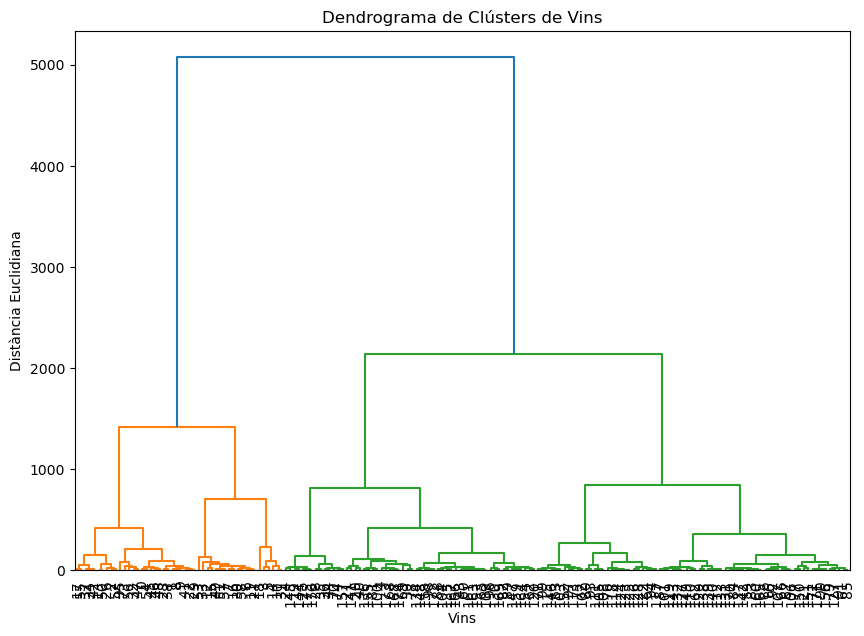

In [13]:
# Genero l'agrupació jeràrquica (metodologia linkage)
Z = linkage(data, method='ward')  # 'ward' és un mètode comú per al clustering jeràrquic

# Creo el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma de Clústers de Vins')
plt.xlabel('Vins')
plt.ylabel('Distància Euclidiana')
plt.show()

Per tal d'obtenir una visualització **més neta** del dendrograma, podem utilitzar la funció `fcluster()` per tal de dir-li exactament quants clústers esperem que tingui el dendrograma i assignar-li un número (entre 1 i 3) a cadascuna de les 178 observacions per tal de classificar-les en un dels 3 grups. Això és precisament el que faig a continuació, mostrant de nou el dendrograma ara amb una **línia de tall vermella** per a que s'entengui millor quins són els 3 clústers que estem assignant a cada vi del *dataset*

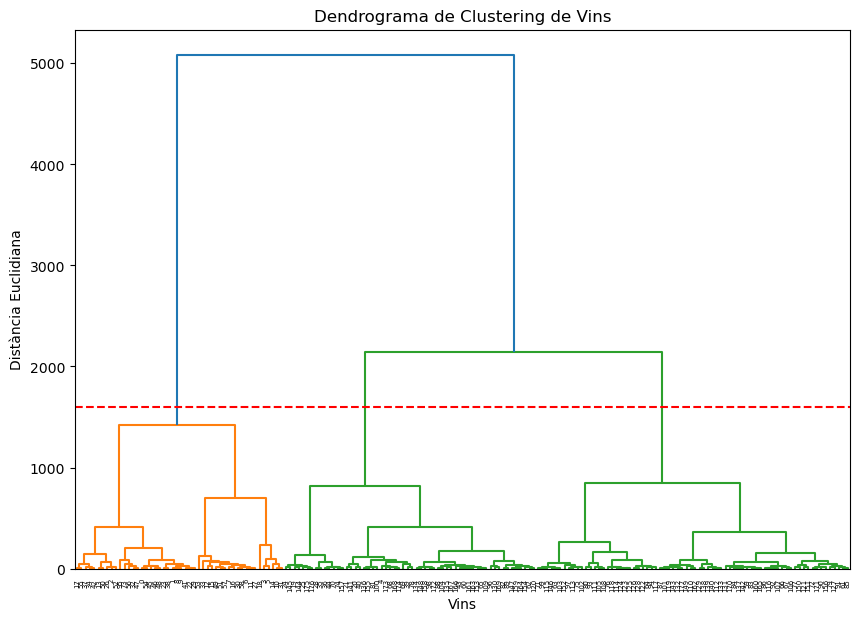

In [28]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, t=3, criterion='maxclust')

# Afegeixo els clústers al DataFrame per veure a quin clúster pertany cada vi
data['Cluster'] = clusters

# Visualitzar el dendrograma amb la línia de tall
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.axhline(y=1600, color='r', linestyle='--')  # Línia de tall (ajusta l'altura si cal)
plt.title("Dendrograma de Clustering de Vins")
plt.xlabel("Vins")
plt.ylabel("Distància Euclidiana")
plt.show()

In [30]:
# Mostro el dataset amb la columna "cluster afegida
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2
